In [ ]:
!pip install --upgrade --force-reinstall nltk --q

In [ ]:
import pandas as pd
pak_id = '1XF94FVGJ2HfInS2jb-JlEUH1JJ2fwupB'
cal_id = '1a9AluzgGh8wrV8eGrHl0dBxMpsMnkZiw'
chi_id = '1Lkp0W-DNPQPr01F2p9WWQH9fXLgNT8pQ'
pak_url = f'https://drive.google.com/uc?id={pak_id}'
cal_url = f'https://drive.google.com/uc?id={cal_id}'
chi_url = f'https://drive.google.com/uc?id={chi_id}'

chile = pd.read_csv(chi_url,sep='\t')
cali = pd.read_csv(cal_url,sep='\t')
pak = pd.read_csv(pak_url,sep='\t')

In [ ]:
display(chile.head())
display(cali.head())
display(pak.head())

,tweet_id,tweet_text,label
0,'451585608612208640',Guys northem chile really needs a support mess...,sympathy_and_emotional_support
1,'451500842395250688',RT @Euphorian54: #Rehearsal time w/ @debbiegib...,not_related_or_irrelevant
2,'451833189439246336',Happy B-Day! @AllRiseSilver https://t.co/jcfCk...,not_related_or_irrelevant
3,'451330668539031552',RT @kuroab_90: My heart goes out to the victim...,sympathy_and_emotional_support
4,'451489071404040192',"Chile Earthquake: 5 Dead, Several Seriously In...",injured_or_dead_people


,tweet_id,tweet_text,label
0,'504075795435094016',"Bridges, overpasses earn approval after Northe...",infrastructure_and_utilities_damage
1,'503765744333901824',"Say what you want, but the earthquake that hit...",other_useful_information
2,'503741064067313665',Cool data analysis of today's Napa earthquake ...,other_useful_information
3,'503910039715725312',California assessing damage after large quake ...,infrastructure_and_utilities_damage
4,'503892224589848576',RT @heyyouapp: California USA Rancho Cucamonga...,caution_and_advice


,tweet_id,tweet_text,label
0,'383600460340666369',RT @Faiz_Baluch: #BalochistanEarthQuake Pakist...,other_useful_information
1,'383790723222364161',#Earthquake 2013-09-28 02:39:43 (M5.0) EAST OF...,other_useful_information
2,'384232048124518400',#earthquake M2.2: Puerto Rico region http://t....,other_useful_information
3,'384860484643475456',#PAKISTAN: #NASA releases images of Pakistan's...,other_useful_information
4,'383407962619772928',"【#USGS #alert】 M 1.5, Central Alaska: Septembe...",other_useful_information


In [ ]:
import numpy as np

In [ ]:
eq = pd.concat([chile, cali, pak], ignore_index=True) #merge the three datasets
eq.head()

,tweet_id,tweet_text,label
0,'451585608612208640',Guys northem chile really needs a support mess...,sympathy_and_emotional_support
1,'451500842395250688',RT @Euphorian54: #Rehearsal time w/ @debbiegib...,not_related_or_irrelevant
2,'451833189439246336',Happy B-Day! @AllRiseSilver https://t.co/jcfCk...,not_related_or_irrelevant
3,'451330668539031552',RT @kuroab_90: My heart goes out to the victim...,sympathy_and_emotional_support
4,'451489071404040192',"Chile Earthquake: 5 Dead, Several Seriously In...",injured_or_dead_people


In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Function to clean the tweet
def clean_tweet(tweet):
    tweet = tweet.lower()

    tweet = re.sub(r'@\w+', '', tweet) # Remove mentions

    tweet = re.sub(r'http\S+', '', tweet) # Remove URLs

    tweet = re.sub(r'[^\w\s#]', '', tweet) # Remove other punctuation

    # Tokenize and remove stop words
    words = tweet.split()
    cleaned_words = [word for word in words if word.lower() not in stop_words]
    stemmed_words = [ps.stem(word) for word in cleaned_words]
    # Join the cleaned words back into a string
    cleaned_tweet = ' '.join(stemmed_words)

    return cleaned_tweet


eq['cleaned_tweet'] = eq['tweet_text'].apply(clean_tweet)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
display(eq[['tweet_text', 'cleaned_tweet']].head())

,tweet_text,cleaned_tweet
0,Guys northem chile really needs a support mess...,guy northem chile realli need support messag #...
1,RT @Euphorian54: #Rehearsal time w/ @debbiegib...,rt #rehears time w amp #teamdeb #hitparad amp ...
2,Happy B-Day! @AllRiseSilver https://t.co/jcfCk...,happi bday #happyhyukday
3,RT @kuroab_90: My heart goes out to the victim...,rt heart goe victim 82 magnitud earthquak chil...
4,"Chile Earthquake: 5 Dead, Several Seriously In...",chile earthquak 5 dead sever serious injur


In [ ]:
X = eq['cleaned_tweet']
y = eq['label']

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Convert the text data to numerical features using TF-IDF
tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

Naive Bayes 10-Fold Cross-Validation Scores: [0.70361991 0.69614512 0.67346939 0.68027211 0.68253968 0.67573696
 0.70294785 0.70294785 0.69614512 0.65759637]
Average Accuracy (Naive Bayes): 0.6871420363017002
Random Forest 10-Fold Cross-Validation Scores: [0.73076923 0.72335601 0.7414966  0.75283447 0.75056689 0.74829932
 0.7414966  0.7414966  0.76643991 0.72335601]
Average Accuracy (Random Forest): 0.7420111634397348


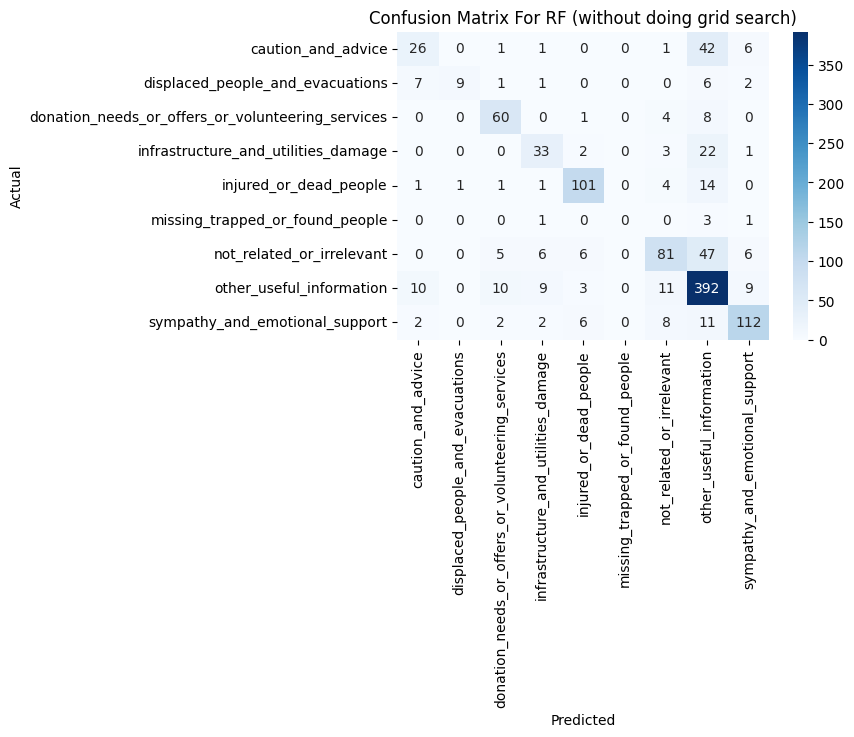

Classification Report:
                                                   precision    recall  f1-score   support

                               caution_and_advice       0.57      0.34      0.42        77
                 displaced_people_and_evacuations       0.90      0.35      0.50        26
donation_needs_or_offers_or_volunteering_services       0.75      0.82      0.78        73
              infrastructure_and_utilities_damage       0.61      0.54      0.57        61
                           injured_or_dead_people       0.85      0.82      0.83       123
                  missing_trapped_or_found_people       0.00      0.00      0.00         5
                        not_related_or_irrelevant       0.72      0.54      0.62       151
                         other_useful_information       0.72      0.88      0.79       444
                   sympathy_and_emotional_support       0.82      0.78      0.80       143

                                         accuracy                

In [ ]:
# 10-Fold Cross-Validation for Naive Bayes
nb_model_10 = MultinomialNB()
nb_scores_10 = cross_val_score(nb_model_10, X_train, y_train, cv=10, scoring='accuracy')
print("Naive Bayes 10-Fold Cross-Validation Scores:", nb_scores_10)
print("Average Accuracy (Naive Bayes):", nb_scores_10.mean())

# 10-Fold Cross-Validation for Random Forest
rf_model_10 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_scores_10 = cross_val_score(rf_model_10, X_train, y_train, cv=10, scoring='accuracy')
print("Random Forest 10-Fold Cross-Validation Scores:", rf_scores_10)
print("Average Accuracy (Random Forest):", rf_scores_10.mean())

rf_model_10.fit(X_train, y_train)
y_pred_rf_10 = rf_model_10.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf_10)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
class_names = np.unique(y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix For RF (without doing grid search)')
plt.show()

# Print classification report for more details (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_10, zero_division=0))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf_10))



Optimized Random forest

In [ ]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],   # Number of trees
    'max_depth': [10, 20, 30, None],   # Depth of each tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required in a leaf node
}

# Initialize GridSearchCV with 10-fold cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search_rf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters (Random Forest):", grid_search_rf.best_params_)
print("Best Cross-Validation Score (Random Forest):", grid_search_rf.best_score_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validation Score (Random Forest): 0.749943118055074


In [51]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

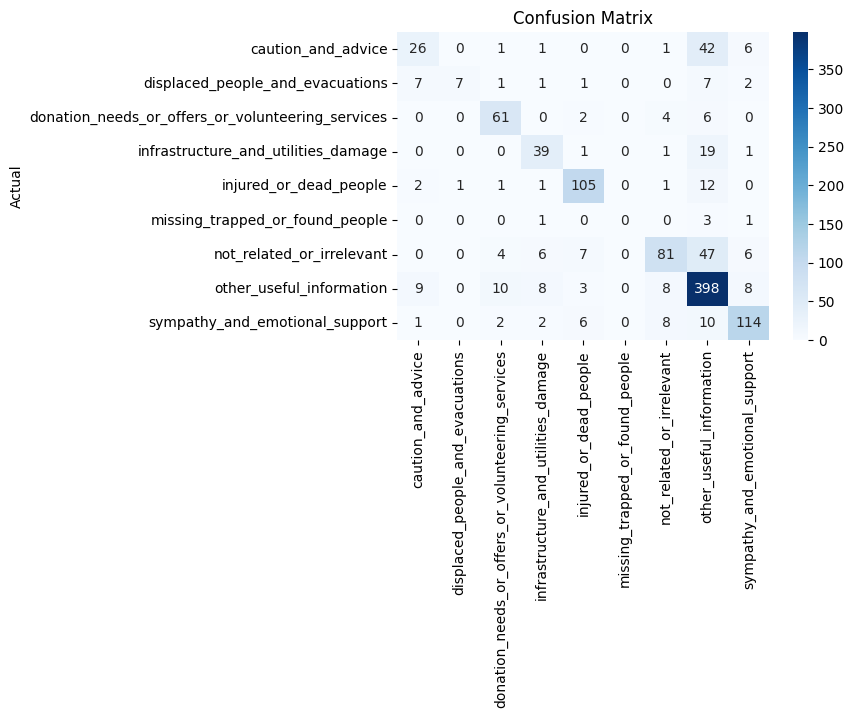

Classification Report:
                                                   precision    recall  f1-score   support

                               caution_and_advice       0.58      0.34      0.43        77
                 displaced_people_and_evacuations       0.88      0.27      0.41        26
donation_needs_or_offers_or_volunteering_services       0.76      0.84      0.80        73
              infrastructure_and_utilities_damage       0.66      0.64      0.65        61
                           injured_or_dead_people       0.84      0.85      0.85       123
                  missing_trapped_or_found_people       0.00      0.00      0.00         5
                        not_related_or_irrelevant       0.78      0.54      0.64       151
                         other_useful_information       0.73      0.90      0.81       444
                   sympathy_and_emotional_support       0.83      0.80      0.81       143

                                         accuracy                

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
class_names = np.unique(y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for more details (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_rf))


Optimized Naive Bayes

In [ ]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Define the hyperparameter grid for Naive Bayes
param_grid_nb = {
    'alpha': [0.1, 0.5, 1.0, 5.0, 10.0]  # The smoothing parameter (alpha)
}

# Initialize GridSearchCV with 10-fold cross-validation
grid_search_nb = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb,
                              cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

# Perform the grid search
grid_search_nb.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters (Naive Bayes):", grid_search_nb.best_params_)
print("Best Cross-Validation Score (Naive Bayes):", grid_search_nb.best_score_)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best Parameters (Naive Bayes): {'alpha': 0.5}
Best Cross-Validation Score (Naive Bayes): 0.7002913986107264


In [ ]:
# Get the best model from the grid search
best_nb_model = grid_search_nb.best_estimator_

# Make predictions or evaluate the models
y_pred_nb = best_nb_model.predict(X_test)

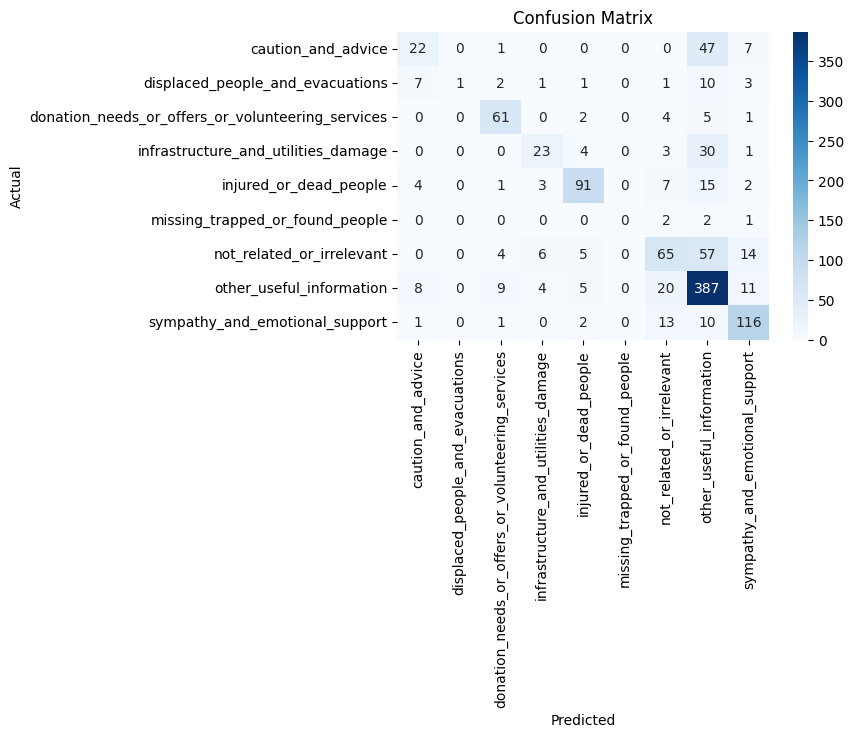

Classification Report:
                                                   precision    recall  f1-score   support

                               caution_and_advice       0.52      0.29      0.37        77
                 displaced_people_and_evacuations       1.00      0.04      0.07        26
donation_needs_or_offers_or_volunteering_services       0.77      0.84      0.80        73
              infrastructure_and_utilities_damage       0.62      0.38      0.47        61
                           injured_or_dead_people       0.83      0.74      0.78       123
                  missing_trapped_or_found_people       0.00      0.00      0.00         5
                        not_related_or_irrelevant       0.57      0.43      0.49       151
                         other_useful_information       0.69      0.87      0.77       444
                   sympathy_and_emotional_support       0.74      0.81      0.78       143

                                         accuracy                

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_nb)

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
class_names = np.unique(y)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print classification report for more details (precision, recall, f1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred_nb, zero_division=0))

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
